In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [209]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [210]:
sp_index = pd.read_csv("sp500_index.csv")
sp_index

,Date,S&P500
0,2014-02-18,1840.76
1,2014-02-19,1828.75
2,2014-02-20,1839.78
3,2014-02-21,1836.25
4,2014-02-24,1847.61
...,...,...
2511,2024-02-08,4997.91
2512,2024-02-09,5026.61
2513,2024-02-12,5021.84
2514,2024-02-13,4953.17


In [211]:
sp_stocks = pd.read_excel("sp500_stocks_4years.xlsx")
sp_stocks.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,MMM,166.588959,180.000000,180.009995,177.139999,177.679993,3601700.0
1,2020-01-03,MMM,165.154465,178.449997,178.660004,175.630005,177.020004,2466900.0
2,2020-01-06,MMM,165.311783,178.619995,178.710007,176.350006,177.149994,1998000.0
3,2020-01-07,MMM,164.645416,177.899994,178.509995,176.820007,178.279999,2173000.0
4,2020-01-08,MMM,167.172028,180.630005,181.500000,177.649994,178.000000,2758300.0


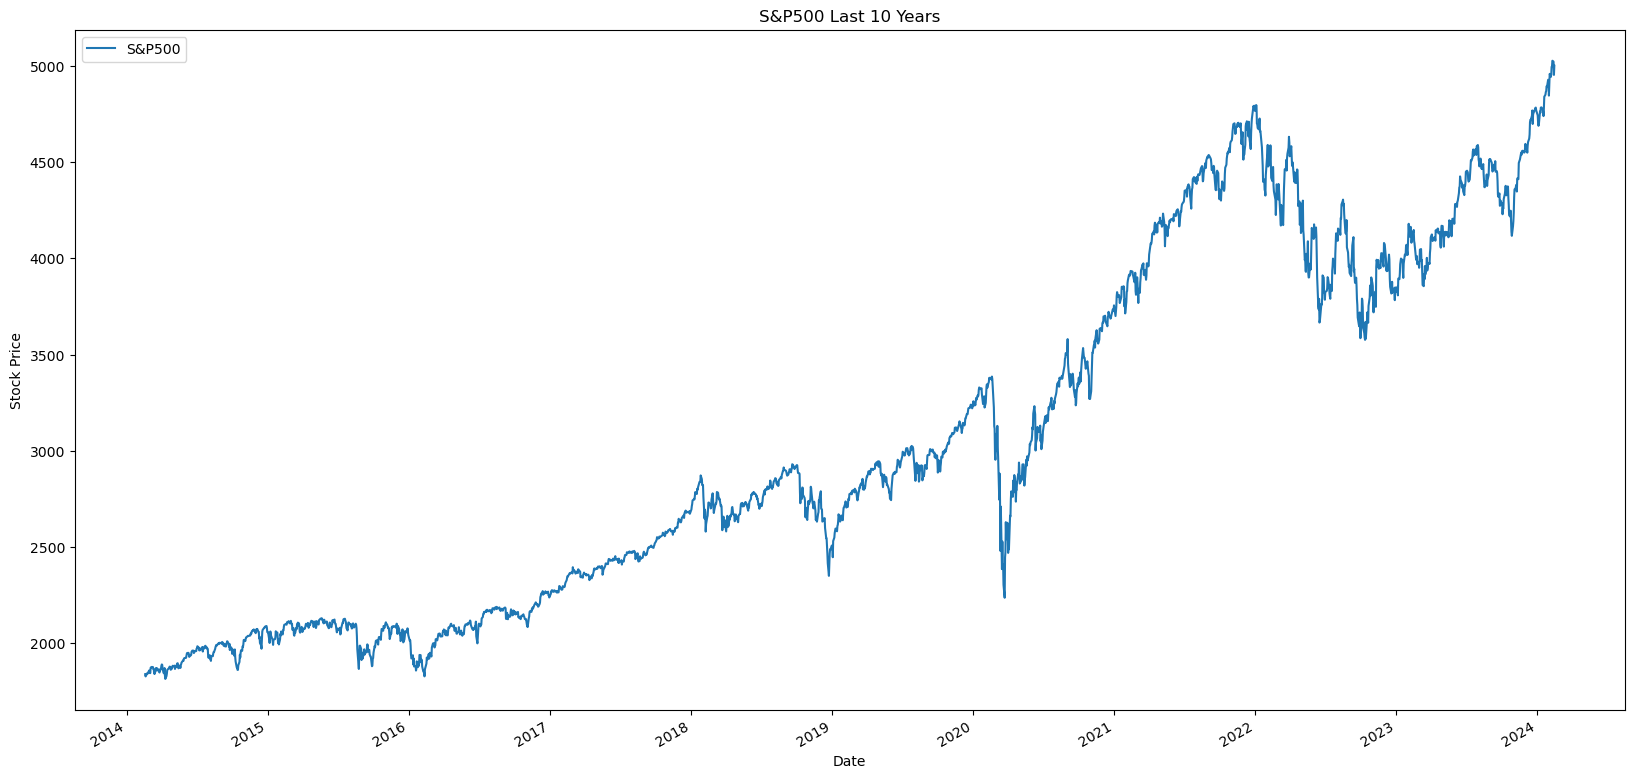

In [212]:
sp_index['Date'] = pd.to_datetime(sp_index.Date,format="%Y-%m-%d")
sp_index.index=sp_index['Date']

# Plot the data
sp_index.plot(x='Date', y='S&P500', kind='line', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('S&P500 Last 10 Years')

# Show the plot
plt.show()

In [292]:
apple_df = sp_stocks[sp_stocks['Symbol'] == 'AAPL']
apple_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
40482,2020-01-02,AAPL,73.059410,75.087502,75.150002,73.797501,74.059998,135480400.0
40483,2020-01-03,AAPL,72.349152,74.357498,75.144997,74.125000,74.287498,146322800.0
40484,2020-01-06,AAPL,72.925644,74.949997,74.989998,73.187500,73.447502,118387200.0
40485,2020-01-07,AAPL,72.582657,74.597504,75.224998,74.370003,74.959999,108872000.0
40486,2020-01-08,AAPL,73.750252,75.797501,76.110001,74.290001,74.290001,132079200.0
...,...,...,...,...,...,...,...,...
41515,2024-02-09,AAPL,188.850006,188.850006,189.990005,188.000000,188.649994,45155200.0
41516,2024-02-12,AAPL,187.149994,187.149994,188.669998,186.789993,188.419998,41781900.0
41517,2024-02-13,AAPL,185.039993,185.039993,186.210007,183.509995,185.770004,56529500.0
41518,2024-02-14,AAPL,184.149994,184.149994,185.529999,182.440002,185.320007,54630500.0


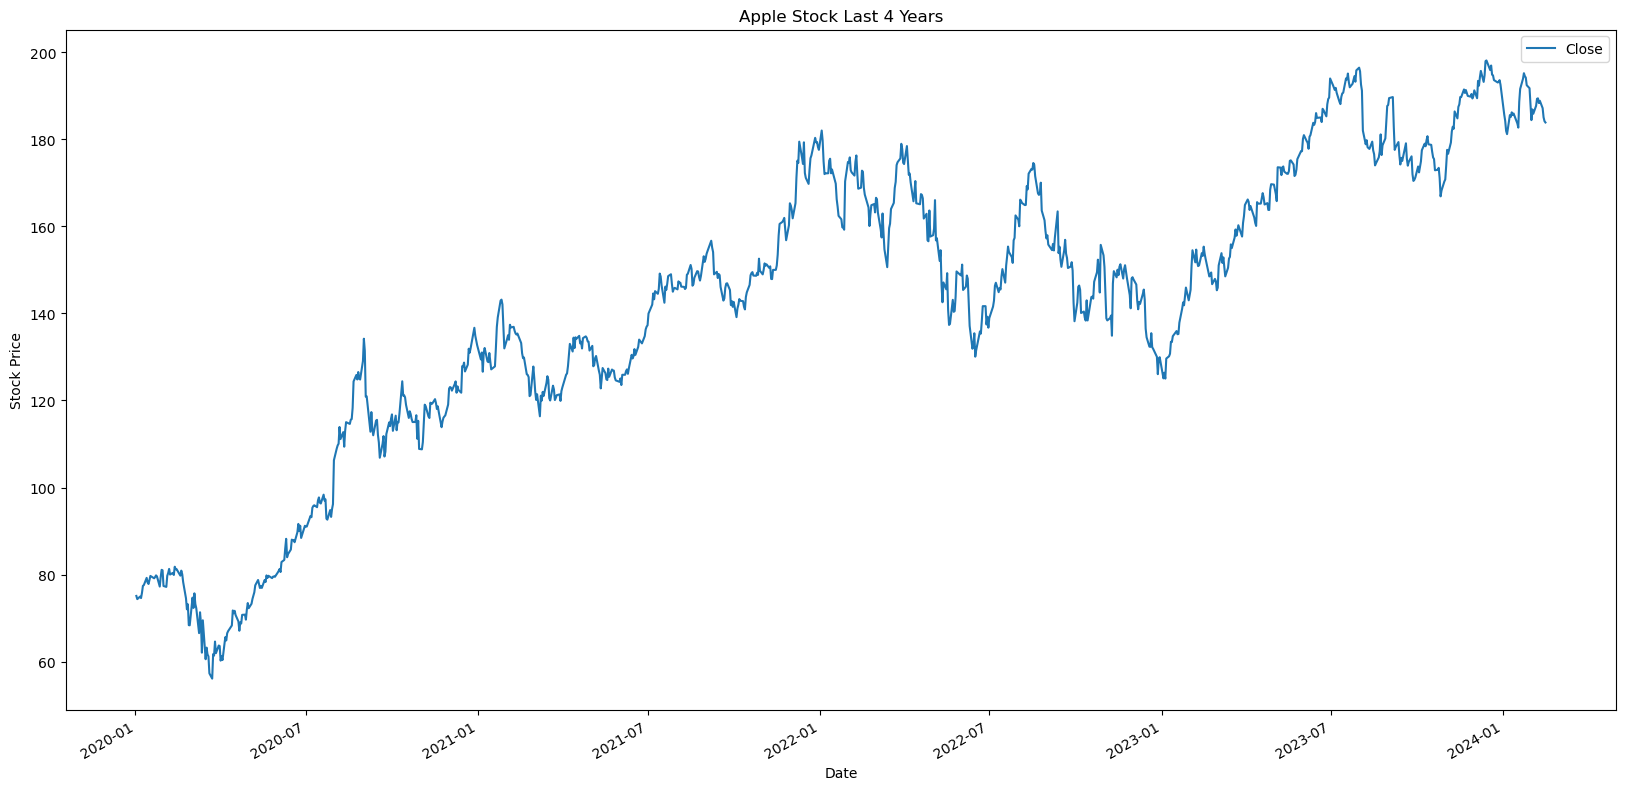

In [293]:
apple_df.plot(x='Date', y='Close', kind='line', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Last 4 Years')

# Show the plot
plt.show()

/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/946486345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_df["Date"]=pd.to_datetime(apple_df.Date,format="%Y-%m-%d")


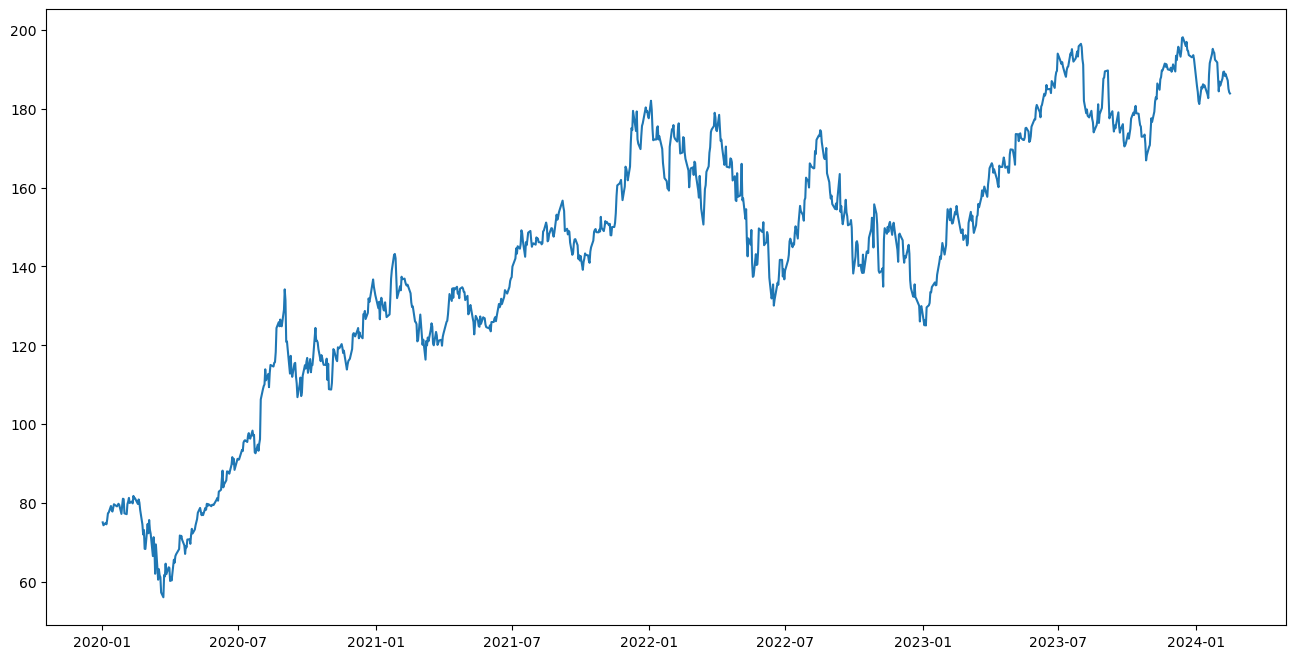

In [335]:
apple_df["Date"]=pd.to_datetime(apple_df.Date,format="%Y-%m-%d")
apple_df.index=apple_df['Date']

plt.figure(figsize=(16,8))
plt.plot(apple_df["Close"],label='Close Price history')

In [336]:
data=apple_df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(data)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]

/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/82126751.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_dataset["Date"][i]=data["Date"][i]
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/82126751.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_dataset["Close"][i]=data["Close"][i]


In [337]:
new_dataset

,Date,Close
0,2020-01-02 00:00:00,75.087502
1,2020-01-03 00:00:00,74.357498
2,2020-01-06 00:00:00,74.949997
3,2020-01-07 00:00:00,74.597504
4,2020-01-08 00:00:00,75.797501
...,...,...
1033,2024-02-09 00:00:00,188.850006
1034,2024-02-12 00:00:00,187.149994
1035,2024-02-13 00:00:00,185.039993
1036,2024-02-14 00:00:00,184.149994


In [338]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:1037,:]
valid_data=final_dataset[1037:,:]

#new_dataset.index=new_dataset.Date
# Convert the "Date" column to string
new_dataset['Date'] = new_dataset['Date'].astype(str)

# Extract only the date part
new_dataset['Date'] = new_dataset['Date'].str.split(' ').str[0]

In [339]:
new_dataset

,Date,Close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501
...,...,...
1033,2024-02-09,188.850006
1034,2024-02-12,187.149994
1035,2024-02-13,185.039993
1036,2024-02-14,184.149994


In [340]:
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset = new_dataset.values

scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [341]:
final_dataset

array([[75.0875015258789],
       [74.3574981689453],
       [74.9499969482421],
       ...,
       [185.039993286132],
       [184.149993896484],
       [183.860000610351]], dtype=object)

In [342]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

977/977 - 18s - loss: 0.0049 - 18s/epoch - 19ms/step


In [343]:
inputs_data

array([[0.94071155],
       [0.95310435],
       [0.94740084],
       [0.95211856],
       [0.94268313],
       [0.94141562],
       [0.94571087],
       [0.93845825],
       [0.94254227],
       [0.95162571],
       [0.93888072],
       [0.96697588],
       [0.95923042],
       [0.9729611 ],
       [0.98310072],
       [0.96528591],
       [0.97605933],
       [0.99894384],
       [1.        ],
       [0.9961977 ],
       [0.98436812],
       [0.99176159],
       [0.97690426],
       [0.97584799],
       [0.96824339],
       [0.96437061],
       [0.96507468],
       [0.96810253],
       [0.96070906],
       [0.91219391],
       [0.90240639],
       [0.88592957],
       [0.88078929],
       [0.91163059],
       [0.90867322],
       [0.9160667 ],
       [0.91184182],
       [0.91416549],
       [0.89804077],
       [0.89135136],
       [0.93324769],
       [0.9538789 ],
       [0.97028534],
       [0.97936868],
       [0.97458059],
       [0.97225692],
       [0.9599345 ],
       [0.955

In [344]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

1/1 [==============================] - 1s 554ms/step


In [345]:
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

1/1 [==============================] - 0s 20ms/step


In [346]:
predicted_closing_price

array([[189.63515]], dtype=float32)

In [347]:
valid_data

array([[Timestamp('2024-02-15 00:00:00'), 183.860000610351]], dtype=object)

In [348]:
import numpy as np

# Assuming valid_data is a NumPy array with at least one element
timestamp = valid_data[0][0]  # Accessing the timestamp value from the NumPy array

# Extract the date part
date_only = timestamp.date()

# Now date_only contains the date without the timestamp

In [349]:
valid_data

array([[Timestamp('2024-02-15 00:00:00'), 183.860000610351]], dtype=object)

In [350]:
train_data=new_dataset[:1037]
valid_data=new_dataset[1037:]
valid_data['Predictions']=predicted_closing_price
valid_data

/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/519016746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


,Close,Predictions
1037,183.860001,189.635147


In [351]:
# Invert scaling to get the predicted value
predicted_value_scaled = lstm_model.predict(x_train_data[-1].reshape(1, -1, 1))
predicted_value = scaler.inverse_transform(predicted_value_scaled)

# Update the dataset with the predicted value
new_close = predicted_value
last_index_date = pd.to_datetime(new_dataset.index[-1])
new_row_index = last_index_date + pd.Timedelta(days=1)
new_row = pd.DataFrame({'Close': [new_close]}, index=[new_row_index])
new_dataset = pd.concat([new_dataset, new_row])


# Repeat prediction for the next 365 days
for i in range(253):
    # Prepare data for prediction
    last_60_days = new_dataset[-60:].values
    scaled_last_60_days = scaler.transform(last_60_days.reshape(-1, 1))
    x_pred = scaled_last_60_days.reshape(1, -1, 1)
    
    # Make prediction
    predicted_value_scaled = lstm_model.predict(x_pred)
    predicted_value = scaler.inverse_transform(predicted_value_scaled)
    
    # Update dataset with the predicted value for the next day
    new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
    new_dataset = pd.concat([new_dataset, new_row])

1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 18ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 18ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 22ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 23ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 29ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 22ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 26ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 35ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 26ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 26ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 18ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 18ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 18ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 23ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 18ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 22ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 60ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 23ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 21ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 22ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 19ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


1/1 [==============================] - 0s 20ms/step


/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])
/var/folders/by/st2c4w_96757fgwg7jsfc4480000gn/T/ipykernel_67404/3699000515.py:25: UserWarning: Discarding nonzero nanoseconds in conversion.
  new_row = pd.DataFrame({'Close': [predicted_value]}, index=[new_dataset.index[-1] + pd.DateOffset(days=1)])


In [352]:
new_dataset

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501
...,...
1970-09-08 00:00:00.000001037,[[227.57185]]
1970-09-09 00:00:00.000001037,[[227.58545]]
1970-09-10 00:00:00.000001037,[[227.59877]]
1970-09-11 00:00:00.000001037,[[227.61191]]


In [353]:
new_dataset.reset_index(drop=True, inplace=True)
new_dataset

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501
...,...
1287,[[227.57185]]
1288,[[227.58545]]
1289,[[227.59877]]
1290,[[227.61191]]


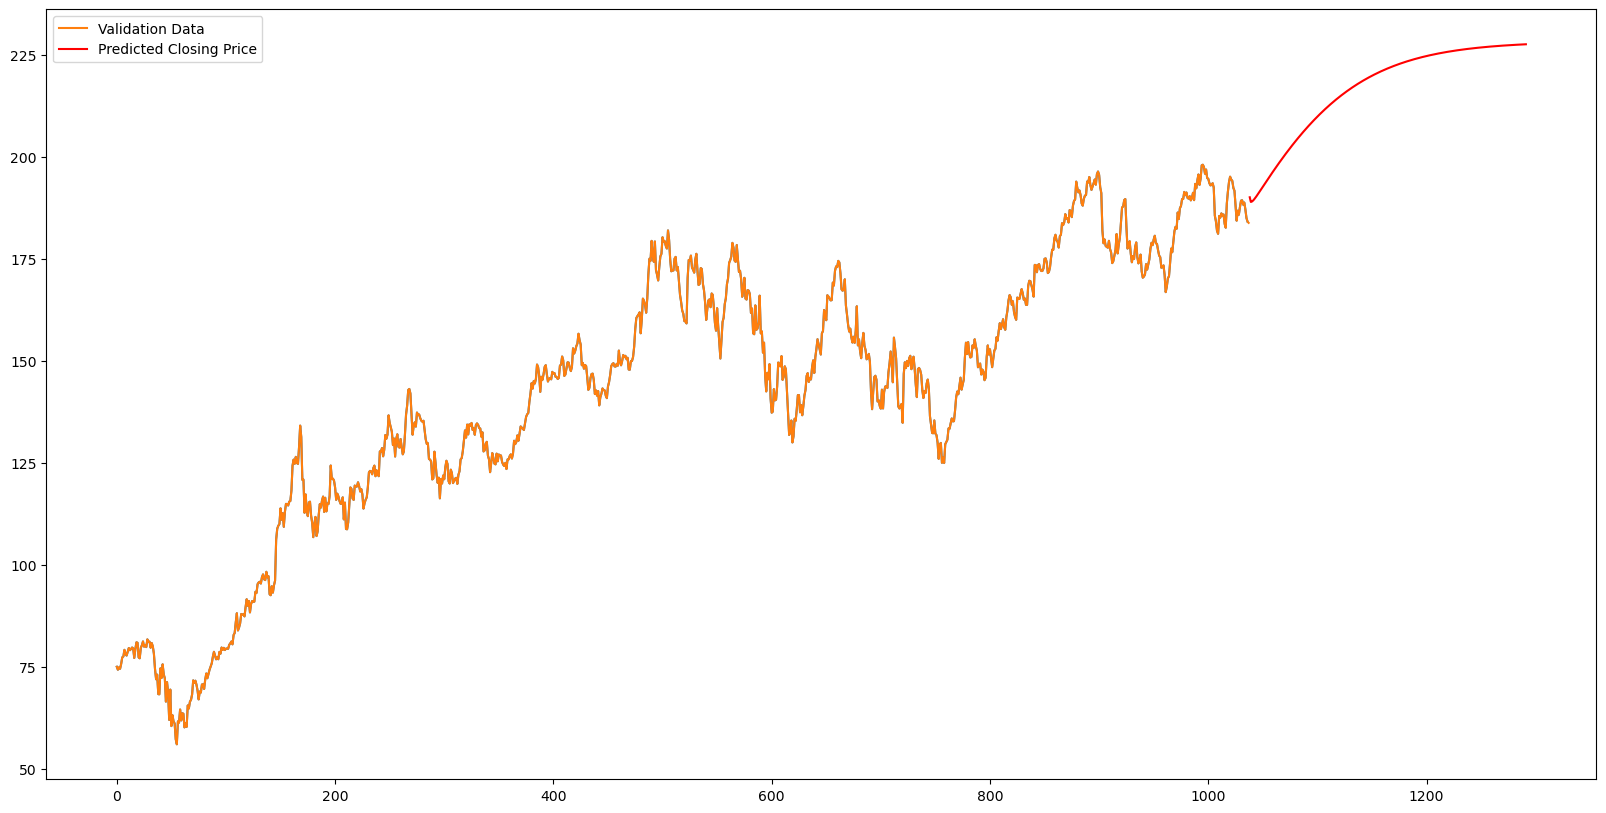

In [354]:
# Split new_dataset into training data and predicted data
training_data = new_dataset.iloc[:1038]
predicted_data = new_dataset.iloc[1038:]

plt.plot(train_data["Close"])

# Plotting the validation data and predictions
plt.plot(training_data.index, training_data['Close'], label='Validation Data')
plt.plot(predicted_data.index, predicted_data['Close'], color='red', label='Predicted Closing Price')

plt.legend()  # Show legend
plt.show()
